In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and prepare the Premier League dataset
pl_df = pd.read_excel('/Users/shivani/Downloads/df.xlsx')

aligned_vars = ['Points_Scored', 'Home_Away', 'Possession', 'Total_Shots', 'Final']
pl_df = pl_df[aligned_vars].dropna()

# Normalize
label_map = {'W': 'W', 'L': 'L', 'D': 'D'}
pl_df['Final'] = pl_df['Final'].map(label_map)

# Encode 'Home_Away'
le = LabelEncoder()
pl_df['Home_Away'] = le.fit_transform(pl_df['Home_Away'])

# Split into features and labels
X = pl_df.drop(columns='Final')
y = pl_df['Final']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           D       0.36      0.13      0.20        30
           L       0.68      0.75      0.71        40
           W       0.64      0.86      0.74        44

    accuracy                           0.63       114
   macro avg       0.56      0.58      0.55       114
weighted avg       0.58      0.63      0.59       114



In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load both datasets
osc_df = pd.read_excel('/Users/shivani/Downloads/soccerstat.xlsx')
pl_df = pd.read_excel('/Users/shivani/Downloads/df.xlsx')

# Rename OSC columns to match PL
osc_df = osc_df.rename(columns={'Points Scored': 'Points_Scored', 'Shots': 'Total_Shots'})

# Select common significant features
features = ['Points_Scored', 'Home_Away', 'Possession', 'Total_Shots', 'Final']
osc_df = osc_df[features].dropna()
pl_df = pl_df[features].dropna()

# Normalize Final labels
label_map = {'Win': 'W', 'Loss': 'L', 'Draw': 'D', 'W': 'W', 'L': 'L', 'D': 'D'}
osc_df['Final'] = osc_df['Final'].map(label_map)
pl_df['Final'] = pl_df['Final'].map(label_map)

# Encode Home_Away consistently
le = LabelEncoder()
combined = pd.concat([osc_df['Home_Away'], pl_df['Home_Away']])
le.fit(combined)
osc_df['Home_Away'] = le.transform(osc_df['Home_Away'])
pl_df['Home_Away'] = le.transform(pl_df['Home_Away'])

# Train on OSC → Test on PL 
X_train_osc = osc_df.drop(columns='Final')
y_train_osc = osc_df['Final']
X_test_pl = pl_df.drop(columns='Final')
y_test_pl = pl_df['Final']

model_osc = RandomForestClassifier(random_state=42)
model_osc.fit(X_train_osc, y_train_osc)
y_pred_osc_to_pl = model_osc.predict(X_test_pl)

report_osc_to_pl = classification_report(y_test_pl, y_pred_osc_to_pl, output_dict=True)

# Model 2: Train/Test within PL 
X = pl_df.drop(columns='Final')
y = pl_df['Final']
X_train_pl, X_test_pl2, y_train_pl, y_test_pl2 = train_test_split(X, y, test_size=0.3, random_state=42)

model_pl = RandomForestClassifier(random_state=42)
model_pl.fit(X_train_pl, y_train_pl)
y_pred_pl = model_pl.predict(X_test_pl2)

report_within_pl = classification_report(y_test_pl2, y_pred_pl, output_dict=True)

# Comparison Table 
classes = ['W', 'L', 'D']
metrics = ['precision', 'recall', 'f1-score']

print("COMPARISON (Train on OSC vs Within PL)\n")
print(f"{'Class':<6} {'Metric':<10} {'OSC→PL':<10} {'PL→PL':<10}")
print("-" * 40)

for cls in classes:
    for metric in metrics:
        osc_score = report_osc_to_pl.get(cls, {}).get(metric, 0)
        pl_score = report_within_pl.get(cls, {}).get(metric, 0)
        print(f"{cls:<6} {metric:<10} {osc_score:<10.2f} {pl_score:<10.2f}")


COMPARISON (Train on OSC vs Within PL)

Class  Metric     OSC→PL     PL→PL     
----------------------------------------
W      precision  0.66       0.64      
W      recall     0.90       0.86      
W      f1-score   0.77       0.74      
L      precision  0.72       0.68      
L      recall     0.54       0.75      
L      f1-score   0.62       0.71      
D      precision  0.30       0.36      
D      recall     0.26       0.13      
D      f1-score   0.28       0.20      


<Axes: title={'center': 'Class Distribution in Training Set'}, xlabel='Final'>

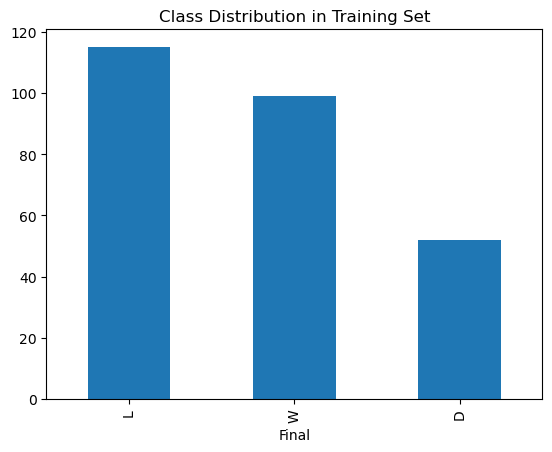

In [6]:
y_train.value_counts().plot(kind='bar', title='Class Distribution in Training Set')


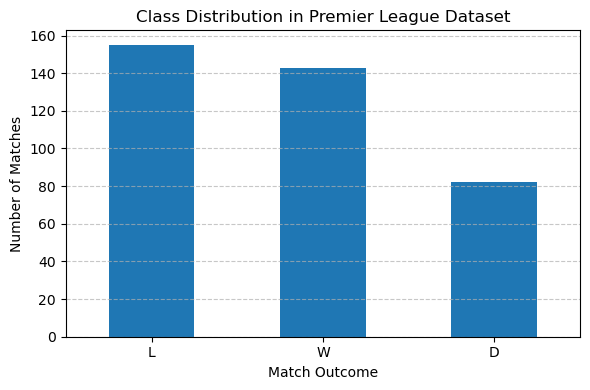

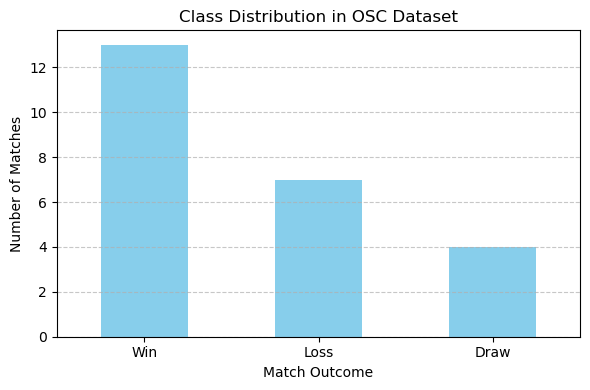

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
osc_df = pd.read_excel('/Users/shivani/Downloads/soccerstat.xlsx')
pl_df = pd.read_excel('/Users/shivani/Downloads/df.xlsx')

# Plot class balance for Premier League
plt.figure(figsize=(6,4))
pl_class_counts = pl_df['Final'].value_counts()
pl_class_counts.plot(kind='bar')
plt.title('Class Distribution in Premier League Dataset')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot class balance for OSC
plt.figure(figsize=(6,4))
osc_class_counts = osc_df['Final'].value_counts()
osc_class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in OSC Dataset')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
osc_df = pd.read_excel('/Users/shivani/Downloads/soccerstat.xlsx')
pl_df = pd.read_excel('/Users/shivani/Downloads/df.xlsx')

# PL dataset
plt.figure(figsize=(6,4))
pl_class_counts = pl_df['Final'].value_counts()
pl_class_counts.plot(kind='bar')
plt.title('Class Distribution in Premier League Dataset')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('/Users/shivani/Downloads/premier_class_distribution.png') 
plt.close()


# OSC Dataset
plt.figure(figsize=(6,4))
osc_class_counts = osc_df['Final'].value_counts()
osc_class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in OSC Dataset')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('/Users/shivani/Downloads/osc_class_distribution.png')  
plt.close()


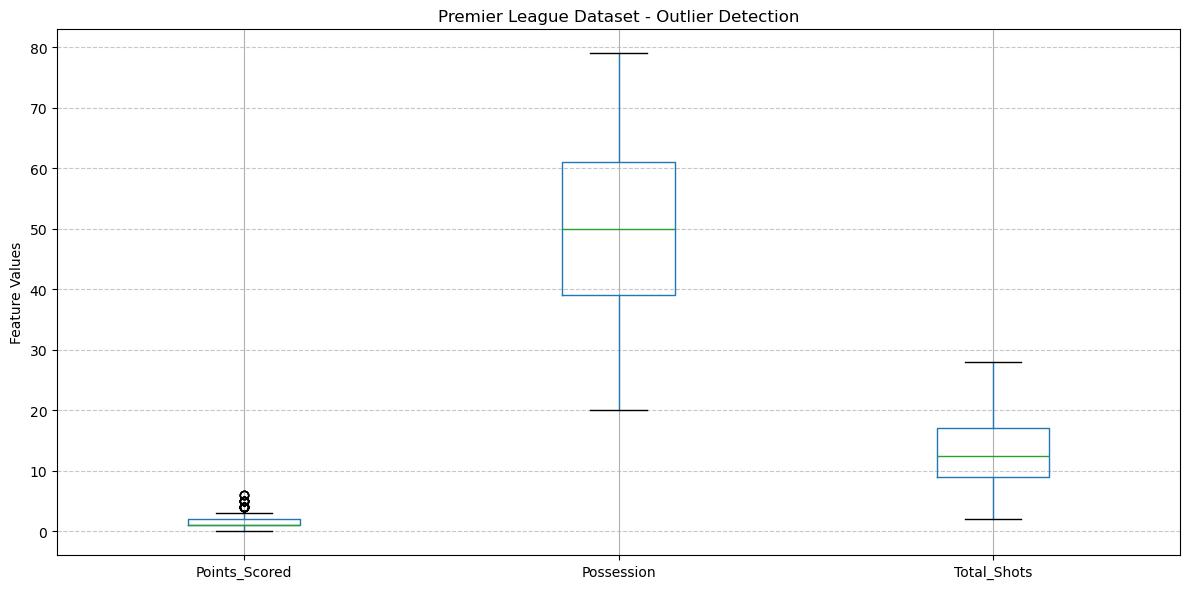

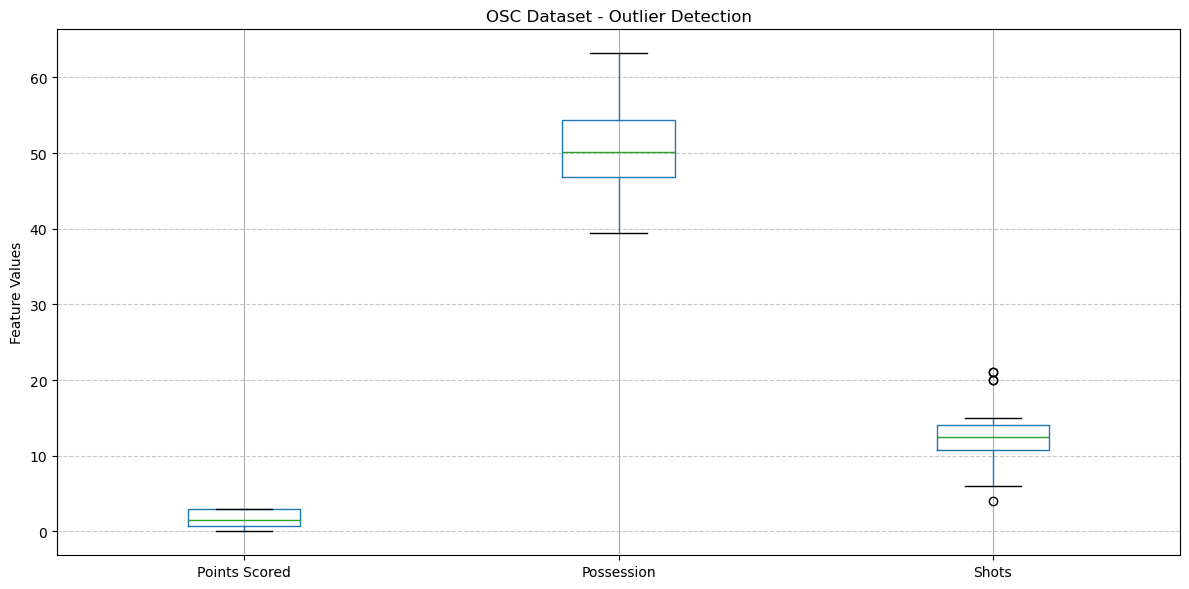

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
osc_df = pd.read_excel('/Users/shivani/Downloads/soccerstat.xlsx')
pl_df = pd.read_excel('/Users/shivani/Downloads/df.xlsx')

# features list for each
osc_features = ['Points Scored', 'Possession', 'Shots']
pl_features = ['Points_Scored', 'Possession', 'Total_Shots']  

# pl dataset
plt.figure(figsize=(12,6))
pl_df[pl_features].boxplot()
plt.title('Premier League Dataset - Outlier Detection')
plt.ylabel('Feature Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/Users/shivani/Downloads/pl_outliers.png')
plt.show()

plt.close()

# osc dataset
plt.figure(figsize=(12,6))
osc_df[osc_features].boxplot()
plt.title('OSC Dataset - Outlier Detection')
plt.ylabel('Feature Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('/Users/shivani/Downloads/osc_outliers.png')
plt.show()
plt.close()


In [18]:
print(osc_df.columns)


Index(['Final', 'Home_Away', 'Possession', 'Shots', 'Shots_On_Goal',
       'Blocked_Shots', 'Total_Passes', 'Passing_Accuracy', 'Corners',
       'Total_Crosses', 'Offsides', 'Aerial_Duels_Won', 'Goalkeeper_Saves',
       'Clearances', 'Fouls', 'Yellow_Cards', 'Red_Cards', 'Team', 'Season',
       'Facundo_Torres', 'Duncan_McGuire', 'Ramiro_Enrique', 'Martín_Ojeda',
       '\tNicolás_Lodeiro', 'Iván_Angulo', 'OP_Team', 'Game_Day',
       'Points Scored', 'Win'],
      dtype='object')
